In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/grocery-store-dataset/GroceryDataset.csv')

In [13]:
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [15]:
df[df.duplicated(keep=False)]

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1343,Paper & Plastic Products,$16.19,After $3.80 OFF,NaN,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Seal Top Bags 1-Gallon Freezer Bags 38 Bag...,4 - 38 Count Boxes\n152 Gallon Freezer Bags To...
1344,Paper & Plastic Products,$16.19,After $3.80 OFF,NaN,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Seal Top Bags 1-Gallon Freezer Bags 38 Bag...,4 - 38 Count Boxes\n152 Gallon Freezer Bags To...
1345,Paper & Plastic Products,$16.19,After $3.80 OFF,NaN,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Seal Top Bags 1-Gallon Freezer Bags 38 Bag...,4 - 38 Count Boxes\n152 Gallon Freezer Bags To...
1346,Paper & Plastic Products,$16.19,After $3.80 OFF,NaN,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Seal Top Bags 1-Gallon Freezer Bags 38 Bag...,4 - 38 Count Boxes\n152 Gallon Freezer Bags To...


In [16]:
df = df.drop([1344,1345,1346])

In [17]:
df.Price.str.len().value_counts()

Price
7.0     1403
8.0      227
6.0      102
20.0       7
22.0       6
10.0       5
21.0       1
Name: count, dtype: int64

In [18]:
df.Price[df.Price.str.len()>19].head()

389    $32.99through-$83.99
578    $54.99through-$59.99
579    $49.99through-$54.99
581    $49.99through-$54.99
589    $49.99through-$54.99
Name: Price, dtype: object

We can't deal with some of the rows with price given in range so instead, it is better to use their average.

In [ ]:
df.Price = df.Price.str.replace('$','').str.replace(',','').str.replace('through-',' ')
df.Price = df.Price.str.strip()

In [20]:
price = df.Price.str.split(expand=True).astype(float)

In [21]:
price = price.fillna(0.0)
price.loc[price[1]!=0,0] = price[price[1]!=0].sum(axis=1)/2
price = price.drop(columns=[1])
df.Price = price

new_df = df.drop(index = df.Price[df.Price==0.0].index)

In [22]:
category_1 = new_df.groupby('Sub Category')['Price'].mean().sort_values(ascending=False).index.to_list()
avg_price = new_df.groupby('Sub Category')['Price'].mean().sort_values(ascending=False).to_list()

category_2 = new_df['Sub Category'].value_counts().index.to_list()
num_products = new_df['Sub Category'].value_counts().to_list()

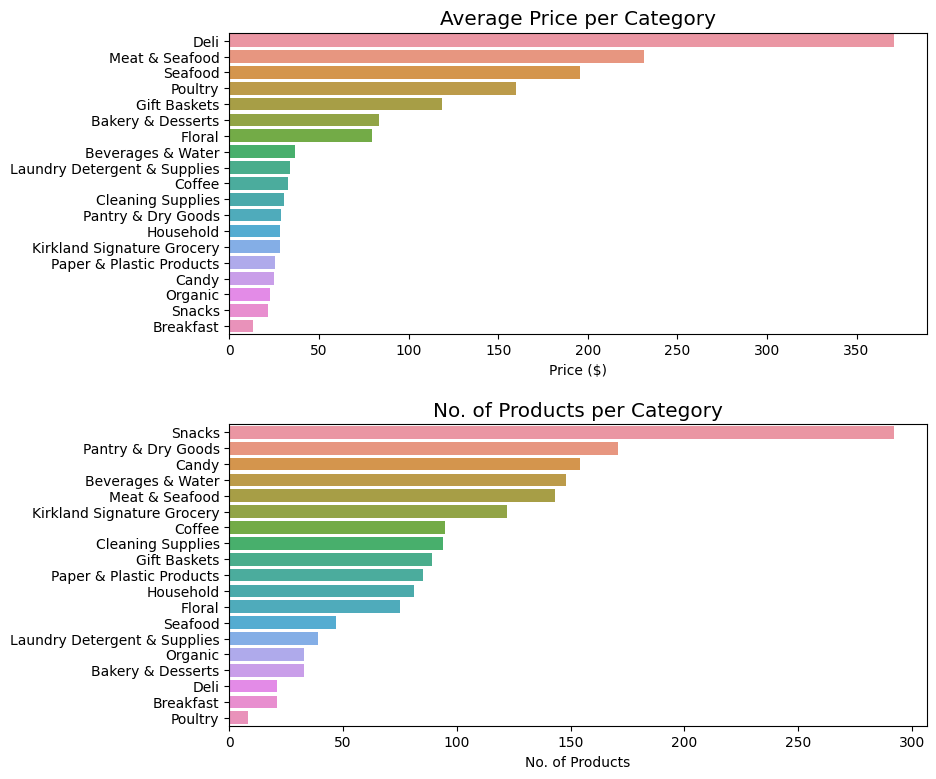

In [23]:
fig, ax = plt.subplots(2,1,figsize=(9, 9))
plt.style.use('bmh')
plt.subplots_adjust(hspace=0.3)

sns.barplot(ax=ax[0], x=avg_price, y=category_1)
ax[0].set_title('Average Price per Category')
ax[0].set_xlabel('Price ($)')


sns.barplot(x=num_products, y=category_2)
ax[1].set_xlabel('No. of Products')
ax[1].set_title('No. of Products per Category')

plt.show()

The products with high average prices are in:
- Deli
- Meat & Seafood
- Seafood' categories

Meanwhile, most of the products sold in the marketplace are in:
- Snacks
- Pantry & Dry Goods
- Candy
This is not to suggest that those expensive products are to be prioritized.

Mean price: 61.26490877993158
Median price: 23.99
Mode price: 14.99


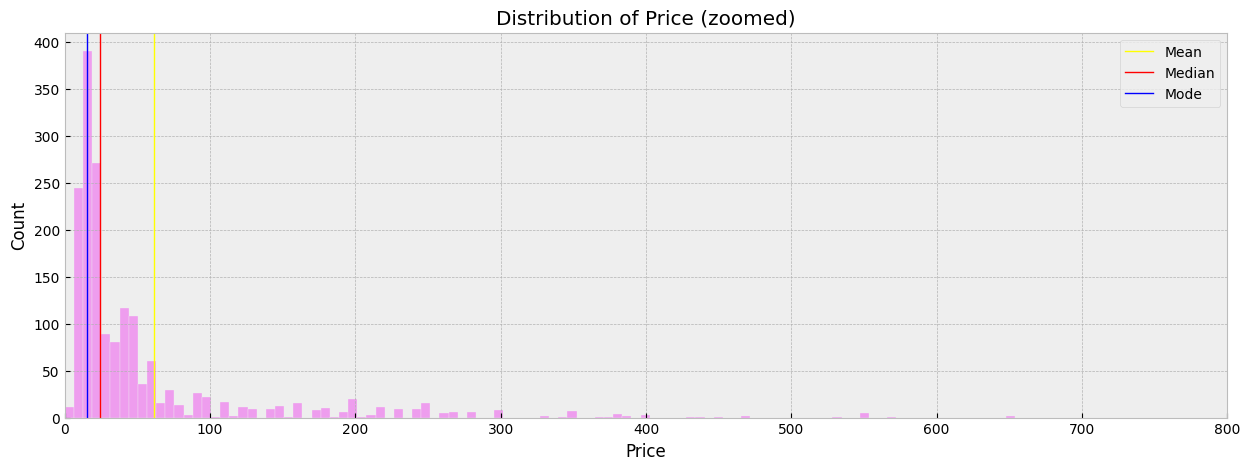

In [24]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(df.Price,color='violet')
ax.set_title("Distribution of Price (zoomed)")
plt.axvline(df.Price.mean(), color='yellow', linewidth=1,label='Mean')
plt.axvline(df.Price.median(), color='red', linewidth=1,label='Median')
plt.axvline(df.Price.mode()[0], color='blue', linewidth=1,label='Mode')
print('Mean price: '+ str(df.Price.mean()))
print('Median price: '+ str(df.Price.median()))
print('Mode price: '+ str(df.Price.mode()[0]))
ax.set_xlim(left=0, right=800)
plt.legend()
plt.show()

In [25]:
df.Rating = df.Rating.replace('No Reviews',None)
df['rating_value'] = df.Rating.str.split(expand=True)[1].astype(float)
df['rating_count'] = df.Rating.str.split(expand=True)[8].astype(float)
total_reviews = df.Rating.str.split(expand=True)[8].astype(float).sum()
rev_by_cat = df.groupby('Sub Category')['rating_count'].sum().sort_values(ascending=False)

In [26]:
df['weighted_rate'] = (df['rating_value']*df['rating_count'])/total_reviews
rate_by_cat = df.groupby('Sub Category')['weighted_rate'].sum().sort_values(ascending=False)

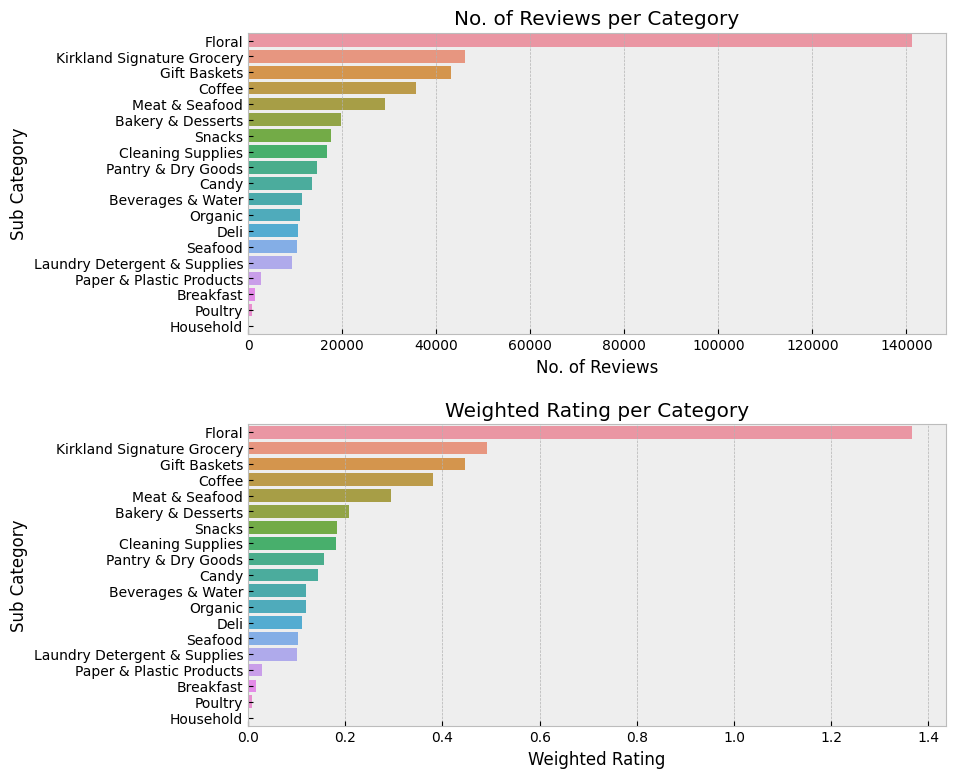

In [27]:
fig, ax = plt.subplots(2,1,figsize=(9, 9))
plt.style.use('bmh')
plt.subplots_adjust(hspace=0.3)

sns.barplot(ax=ax[0], x= rev_by_cat,y= rev_by_cat.index)
ax[0].set_title("No. of Reviews per Category")
ax[0].set_xlabel('No. of Reviews')

sns.barplot(x=rate_by_cat, y=rate_by_cat.index)
ax[1].set_xlabel('Weighted Rating')
ax[1].set_title('Weighted Rating per Category')

plt.show()

In [28]:
unweighted = df.groupby('Sub Category')['rating_value'].mean().sort_values(ascending=False)

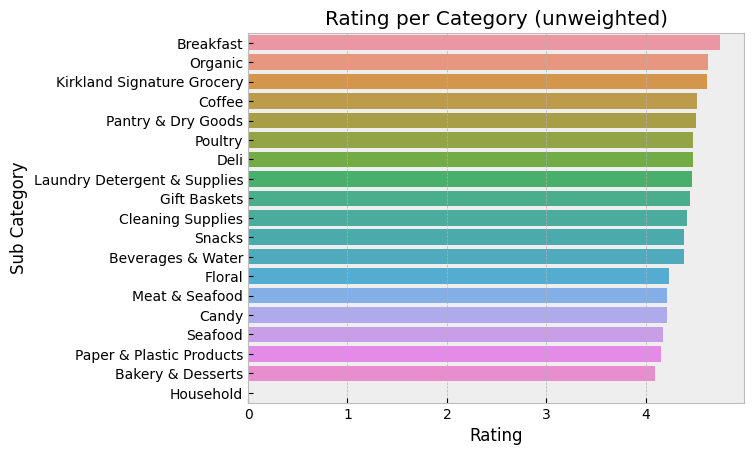

In [31]:
ax= sns.barplot(x= unweighted,y= unweighted.index)
ax.set_title("Rating per Category (unweighted)")
ax.set_xlabel('Rating')
plt.show()